In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("ppda_direct_attack_goals.csv")
df.head()

,Team,League,PPDA,Direct Attack Goals
0,Bournemouth,Premier League,9.9,NaN
1,Arsenal,Premier League,10.0,8.0
2,Tottenham,Premier League,10.0,9.0
3,Liverpool,Premier League,10.3,10.0
4,Brighton,Premier League,10.8,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Team                 41 non-null     object 
 1   League               41 non-null     object 
 2   PPDA                 25 non-null     float64
 3   Direct Attack Goals  25 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.4+ KB


In [18]:
df.dropna(subset=['PPDA', 'Direct Attack Goals'], inplace=True)

In [20]:
df.head()

,Team,League,PPDA,Direct Attack Goals
1,Arsenal,Premier League,10.0,8.0
2,Tottenham,Premier League,10.0,9.0
3,Liverpool,Premier League,10.3,10.0
7,Barcelona,La Liga,8.2,10.0
18,Dortmund,Bundesliga,11.4,6.0


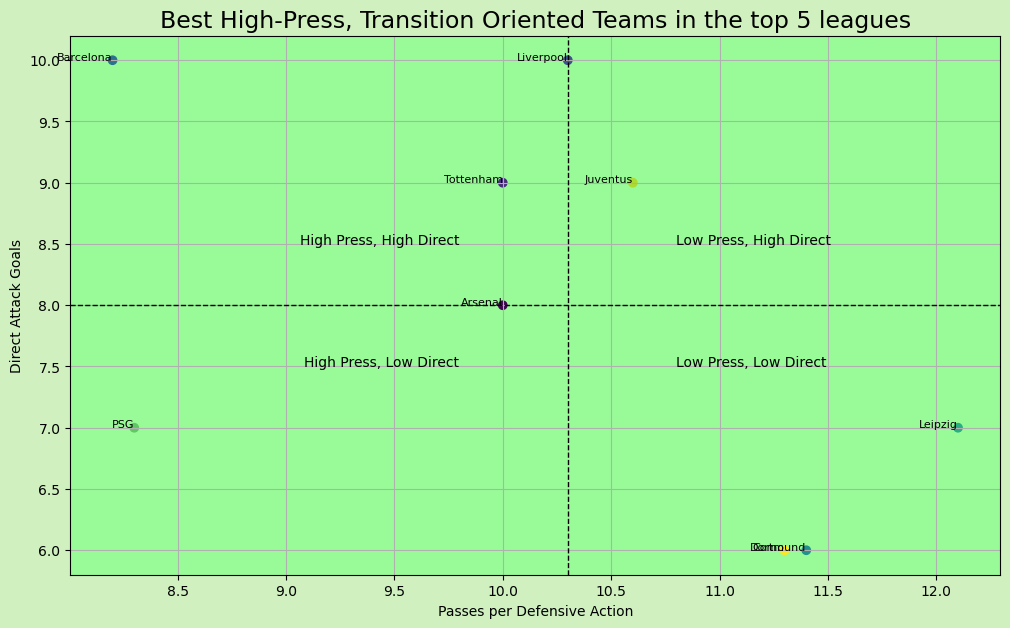

In [42]:
colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
plt.figure(figsize=(12, 7), facecolor='#D0F0C0')
ax = plt.gca()
ax.set_facecolor('#98FB98')
plt.scatter(df['PPDA'], df['Direct Attack Goals'], color=colors)
median_ppda = df['PPDA'].median()
median_direct = df['Direct Attack Goals'].median()

# Add quadrant lines
plt.axhline(median_direct, color='black', linestyle='--', linewidth=1)
plt.axvline(median_ppda, color='black', linestyle='--', linewidth=1)

# Optional: Annotate quadrants
plt.text(median_ppda - 0.5, median_direct + 0.5, 'High Press, High Direct', fontsize=10, ha='right')
plt.text(median_ppda + 0.5, median_direct + 0.5, 'Low Press, High Direct', fontsize=10, ha='left')
plt.text(median_ppda - 0.5, median_direct - 0.5, 'High Press, Low Direct', fontsize=10, ha='right')
plt.text(median_ppda + 0.5, median_direct - 0.5, 'Low Press, Low Direct', fontsize=10, ha='left')
for i, row in df.iterrows():
    plt.text(row["PPDA"], row["Direct Attack Goals"], row["Team"], fontsize=8, ha='right')
plt.xlabel('Passes per Defensive Action')
plt.ylabel('Direct Attack Goals')
plt.title('Best High-Press, Transition Oriented Teams in the top 5 leagues', fontsize=17)
plt.grid(True)
plt.show()

In [44]:
df

,Team,League,PPDA,Direct Attack Goals
1,Arsenal,Premier League,10.0,8.0
2,Tottenham,Premier League,10.0,9.0
3,Liverpool,Premier League,10.3,10.0
7,Barcelona,La Liga,8.2,10.0
18,Dortmund,Bundesliga,11.4,6.0
20,Leipzig,Bundesliga,12.1,7.0
24,PSG,Ligue 1,8.3,7.0
34,Juventus,Serie A,10.6,9.0
35,Como,Serie A,11.3,6.0
